In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


Text(0.5, 1.0, '5')

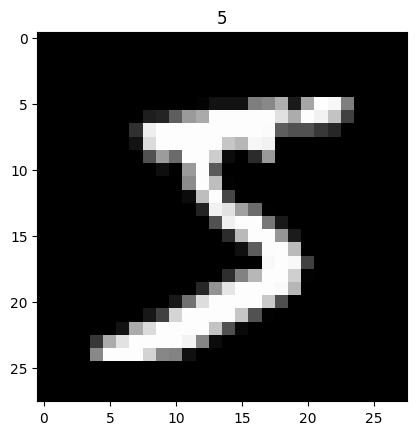

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")
plt.title(y_train[0])


In [7]:

print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)



# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(len(x_train), 28,28,1)
x_test = x_test.reshape(len(x_test), 28,28,1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])



import numpy as np
np.unique(y_train)

print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)


shape of x_train (60000, 28, 28)
shape of y_train (60000,)
shape of x_test (10000, 28, 28)
shape of y_test (10000,)
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
shape of x_train (60000, 28, 28, 1)
shape of x_test (10000, 28, 28, 1)


In [8]:

from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten,Dense
# Define the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [9]:

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,13

 Total params: 2,333,130 (8.90 MB)

 Trainable params: 2,331,338 (8.89 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [10]:

# Compile the model with sparse categorical crossentropy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 145ms/step - accuracy: 0.8416 - loss: 0.7004 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 145ms/step - accuracy: 0.9765 - loss: 0.0840 - val_accuracy: 0.9842 - val_loss: 0.0553
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 145ms/step - accuracy: 0.9808 - loss: 0.0706 - val_accuracy: 0.9885 - val_loss: 0.0383
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 145ms/step - accuracy: 0.9840 - loss: 0.0590 - val_accuracy: 0.9913 - val_loss: 0.0287
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 135s 144ms/step - accuracy: 0.9857 - loss: 0.0546 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 145ms/step - accuracy: 0.9869 - loss: 0.0495 - val_accuracy: 0.9913 - val_loss: 0.0315
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 145ms/step - accuracy: 0.9892 - loss: 0.0422 - val_accuracy: 0.9935 - val_loss: 0.0233
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 147ms/step - accuracy: 0.9894 -

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
model.save("mnist_model.h5")

In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:

from pyngrok import ngrok
ngrok.set_auth_token('2rO6hoC0VHM46eN3SQWaliuUlaN_2KrWL93WaqNv5zXFuNa9t')

In [ ]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps

# Load your trained model
model = tf.keras.models.load_model('f_mnist_model.h5')  # Replace with your model path

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to preprocess the image
def preprocess_image(img):
    img = img.resize((28, 28))
    img = img.convert('L')  # Convert to grayscale
    img = ImageOps.invert(img)  # Invert colors
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img /= 255.0
    return img

# Streamlit app
st.title('Fashion MNIST Classifier')

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Make prediction
    prediction = model.predict(processed_image)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)

    st.write(f"Prediction: {predicted_class}")
    st.write(f"Confidence: {confidence:.2f}")

In [ ]:
import subprocess
from pyngrok import ngrok

# Start the Streamlit app using subprocess
process = subprocess.Popen(['streamlit', 'run', 'main.py'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Create a public URL using ngrok
public_url = ngrok.connect(8501)  # Streamlit's default port
print(f"Your Streamlit app is available at: {public_url}")

try:
    # Keep the script running to maintain the ngrok tunnel
    process.wait()
except KeyboardInterrupt:
    print("Terminating the Streamlit app...")
    process.terminate()
    ngrok.kill()
